In [10]:
import numpy as np
import cv2
import matplotlib
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
img = cv2.imread('./test_images/Barcelona transfer roundup_ Messi could.jpg')
img.shape

(960, 1280, 3)

In the above output, we have 3 dimensions. First two are x and y co-ordinates and last one is RGB channel

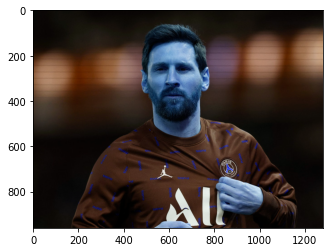

In [12]:
plt.imshow(img)

In [13]:
#for grayscale image
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
gray.shape

(960, 1280)

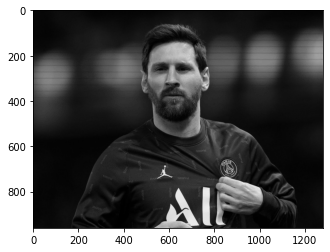

In [14]:
plt.imshow(gray, cmap='gray')

In [15]:
face_cascade = cv2.CascadeClassifier('.\opencv\haarcascades\haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier('.\opencv\haarcascades\haarcascade_eye.xml')

faces = face_cascade.detectMultiScale(gray, 1.3, 5)
faces

array([[472, 150, 290, 290]])

Output returns array of faces. If they were 2 faces, it would have returned 2 arrays
[X, Y, width, height]

In [16]:
#drawing the face
(x,y,w,h) = faces[0]
x,y,w,h

(472, 150, 290, 290)

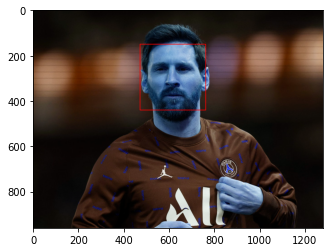

In [17]:
face_img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)    #(x, y) are the rectangle dimensions. (255,0,0) means R. So it will draw a red rectangle
plt.imshow(face_img)

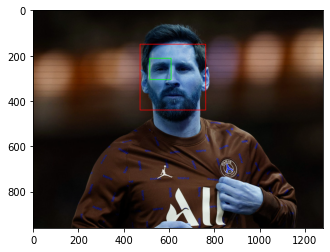

In [18]:
cv2.destroyAllWindows()
for (x,y,w,h) in faces:
    img = cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = img[y:y+h, x:x+w]
    eyes = eye_cascade.detectMultiScale(roi_gray)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey), (ex+ew, ey+eh), (0,255,0), 2)

plt.figure()
plt.imshow(face_img, cmap='gray')
plt.show()

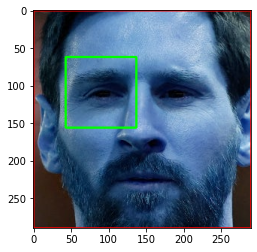

In [19]:
plt.imshow(roi_color, cmap='gray')  #roi stands for region of interest

Wavelet transform helps to extract face features like lips, nose, ears, etc. There are other libraries to do the same but this one is the most effective. The features are extracted using black and white colors. For different regions, different shade of black/white is used
 

In [47]:
import pywt

def w2d(img, mode = 'haar', level = 1):
    imArray = img

    #converting img to grayscale
    imArray = cv2.cvtColor(imArray, cv2.COLOR_BGR2GRAY)

    #converting to float
    imArray = np.float32(imArray)
    imArray /= 255;

    #computing coefficients
    coeffs = pywt.wavedec2(imArray, mode, level=level)

    #Process Coefficients
    coeffs_H = list(coeffs)
    coeffs_H[0] *= 0

    #Reconstruction
    imArray_H = pywt.waverec2(coeffs_H, mode);
    imArray_H *= 255;
    imArray_H = np.uint8(imArray_H)

    return imArray_H

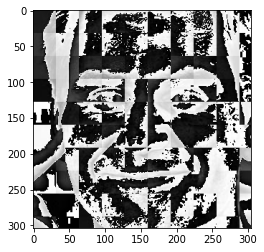

In [48]:
im_har = w2d(cropped_img, 'db1', 5)
plt.imshow(im_har, cmap = 'gray')

In [49]:
#creating a function to do this crop image thing for all the images in the dataset
def get_cropped_img(img_path):
    img = cv2.imread(img_path)
    if(img is not None):
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        faces = face_cascade.detectMultiScale(gray, 1.3, 5)
        for (x,y,w,h) in faces:
            roi_gray = gray[y:y+h, x:x+w]
            roi_color = img[y:y+h, x:x+w]
            eyes = eye_cascade.detectMultiScale(roi_gray)
            if(len(eyes) >= 2):
                return roi_color

#plt.imshow(roi_color)

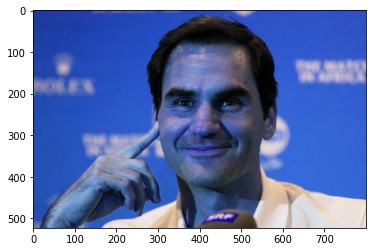

In [21]:
original_img = cv2.imread('./test_images/download.jfif')
plt.imshow(original_img)

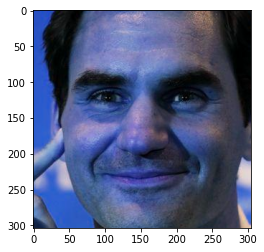

In [22]:
cropped_img = get_cropped_img('./test_images/download.jfif')
plt.imshow(cropped_img) #will give error if the img does not have 2 eyes. Because the cropped_img error will be empty

In [50]:
path_to_data = "./dataset/"
path_to_cropped_data = "./dataset/cropped/"

In [51]:
import os
img_dirs = []
for entry in os.scandir(path_to_data):
    if entry.is_dir():
        img_dirs.append(entry.path)

In [52]:
img_dirs

['./dataset/cropped',
 './dataset/maria_sharapova',
 './dataset/messi',
 './dataset/puyol',
 './dataset/roger_federer',
 './dataset/serena_williams',
 './dataset/ter_stegen',
 './dataset/virat_kohli']

In [53]:
#creating cropped folder
import shutil
if os.path.exists(path_to_cropped_data):
    shutil.rmtree(path_to_cropped_data)     #if the folder exists, delete it
os.mkdir(path_to_cropped_data)              #now make a new folder

In [54]:
cropped_img_dirs = []
player_name_dict = {}

for img_dir in img_dirs:
    count = 1
    player_name = img_dir.split('/')[-1]    #this -1 will return the player name. 'dataset/messi' so -1 will give messi
    #print(player_name)

    player_name_dict[player_name] = []  #initializing the dictionary

    for entry in os.scandir(img_dir):
        roi_color = get_cropped_img(entry.path) 
        if roi_color is not None:
            cropped_folder = path_to_cropped_data + player_name
            if not os.path.exists(cropped_folder):
                os.makedirs(cropped_folder)
                cropped_img_dirs.append(cropped_folder)
                print("Generating cropped images in folder: ",cropped_folder)
                
            cropped_file_name = player_name + str(count) + ".png"
            cropped_file_path = cropped_folder + "/" + cropped_file_name

            cv2.imwrite(cropped_file_path, roi_color)
            player_name_dict[player_name].append(cropped_file_path)
            count +=1

Generating cropped images in folder:  ./dataset/cropped/maria_sharapova
Generating cropped images in folder:  ./dataset/cropped/messi
Generating cropped images in folder:  ./dataset/cropped/puyol
Generating cropped images in folder:  ./dataset/cropped/roger_federer
Generating cropped images in folder:  ./dataset/cropped/serena_williams
Generating cropped images in folder:  ./dataset/cropped/ter_stegen
Generating cropped images in folder:  ./dataset/cropped/virat_kohli


In [56]:
player_name_dict = {}
for img_dir in cropped_img_dirs:
    player_name = img_dir.split('/')[-1]
    file_list = []
    for entry in os.scandir(img_dir):
        file_list.append(entry.path)
    player_name_dict[player_name] = file_list
player_name_dict

{'maria_sharapova': ['./dataset/cropped/maria_sharapova\\maria_sharapova10.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova11.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova13.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova14.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova15.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova16.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova17.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova18.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova19.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova2.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova21.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova22.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova23.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova24.png',
  './dataset/cropped/maria_sharapova\\maria_sharapova25.png',
  './dataset/cropped/maria_sharapova\\maria_sharapov

In [57]:
class_dict = {}
count = 0
for player_name in player_name_dict.keys():
    class_dict[player_name] = count
    count += 1
class_dict

{'maria_sharapova': 0,
 'messi': 1,
 'puyol': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'ter_stegen': 5,
 'virat_kohli': 6}

In [58]:
X = []
Y = []
for player_name, training_files in player_name_dict.items():
    for training_image in training_files:
        img = cv2.imread(training_image)
        if img is None:
            continue
        scalled_raw_img = cv2.resize(img, (32,32)) #resizing all the raw images so that we have a std
        img_har = w2d(img, 'db1', 5)
        scalled_har_img = cv2.resize(img_har, (32,32)) #resizing all the har images so that we have a std

        #stacking the images above each other using numpy. We will use this stack (raw and wavelet images) to train our model
        combined_img = np.vstack((scalled_raw_img.reshape(32*32*3, 1), scalled_har_img.reshape(32*32, 1))) #since raw img has color therefore *3 because RGB color
        X.append(combined_img)
        Y.append(class_dict[player_name])    

        
     

In [59]:
len(X)

220

In [60]:
len(X[0])   #32*32*3 + 32*32

4096

In [61]:
X = np.array(X).reshape(len(X),4096).astype(float)
X.shape

(220, 4096)

In [62]:
X[0]

array([ 99., 139., 181., ..., 242., 232., 250.])

We will use SVM for the classification and later GridSearchCV

In [38]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report

In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, random_state=0)

In [64]:
len(X_train)

165

In [65]:
len(X_test)

55

In [41]:
pipe = Pipeline([('scaler', StandardScaler()), ('svc', SVC(kernel='rbf', C=100))])

In [66]:
pipe.fit(X_train, y_train)

Pipeline(steps=[('scaler', StandardScaler()), ('svc', SVC(C=100))])

In [67]:
pipe.score(X_test, y_test)

0.8181818181818182

In [68]:
print(classification_report(y_test, pipe.predict(X_test)))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94         8
           1       0.64      0.88      0.74         8
           2       1.00      0.50      0.67         4
           3       0.50      0.75      0.60         4
           4       1.00      0.56      0.71         9
           5       1.00      0.83      0.91        12
           6       0.83      1.00      0.91        10

    accuracy                           0.82        55
   macro avg       0.84      0.79      0.78        55
weighted avg       0.86      0.82      0.82        55



Precision 1 means, the model was 100 accurate for number 2 and 4 which are puyol and serena williams

In [71]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV

In [74]:
model_params = {
    'svm': {
        'model': svm.SVC(gamma='auto',probability=True),
        'params' : {
            'svc__C': [1,10,100,1000],
            'svc__kernel': ['rbf','linear']
        }  
    },
    'random_forest': {
        'model': RandomForestClassifier(),
        'params' : {
            'randomforestclassifier__n_estimators': [1,5,10]
        }
    },
    'logistic_regression' : {
        'model': LogisticRegression(solver='liblinear',multi_class='auto'),
        'params': {
            'logisticregression__C': [1,5,10]
        }
    }
}

In [75]:
scores = []
best_estimators = {}
import pandas as pd
for algo, mp in model_params.items():
    pipe = make_pipeline(StandardScaler(), mp['model'])
    clf =  GridSearchCV(pipe, mp['params'], cv=5, return_train_score=False)
    clf.fit(X_train, y_train)
    scores.append({
        'model': algo,
        'best_score': clf.best_score_,
        'best_params': clf.best_params_
    })
    best_estimators[algo] = clf.best_estimator_
    
df = pd.DataFrame(scores,columns=['model','best_score','best_params'])
df

,model,best_score,best_params
0,svm,0.787879,"{'svc__C': 1, 'svc__kernel': 'linear'}"
1,random_forest,0.569697,{'randomforestclassifier__n_estimators': 10}
2,logistic_regression,0.787879,{'logisticregression__C': 1}


SVM and logistic regression gave better accuracy compared to random forest. Overall bad accuracy is because the dataset is very small

In [76]:
best_estimators

{'svm': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('svc',
                  SVC(C=1, gamma='auto', kernel='linear', probability=True))]),
 'random_forest': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('randomforestclassifier',
                  RandomForestClassifier(n_estimators=10))]),
 'logistic_regression': Pipeline(steps=[('standardscaler', StandardScaler()),
                 ('logisticregression',
                  LogisticRegression(C=1, solver='liblinear'))])}

In [77]:
best_estimators['svm'].score(X_test, y_test)

0.8181818181818182

In [78]:
best_estimators['random_forest'].score(X_test, y_test)

0.5818181818181818

In [79]:
best_estimators['logistic_regression'].score(X_test, y_test)

0.8545454545454545

For training data, SVM and Logistic were same but for the test sample, Logistic is better. But this does not mean logistic is better. There is no one answer

In [80]:
best_clf = best_estimators['svm']

In [81]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, best_clf.predict(X_test))
cm

array([[ 7,  0,  0,  1,  0,  0,  0],
       [ 0,  6,  2,  0,  0,  0,  0],
       [ 0,  0,  3,  1,  0,  0,  0],
       [ 0,  1,  0,  3,  0,  0,  0],
       [ 2,  0,  0,  1,  6,  0,  0],
       [ 1,  1,  0,  0,  0, 10,  0],
       [ 0,  0,  0,  0,  0,  0, 10]], dtype=int64)

Text(69.0, 0.5, 'Truth')

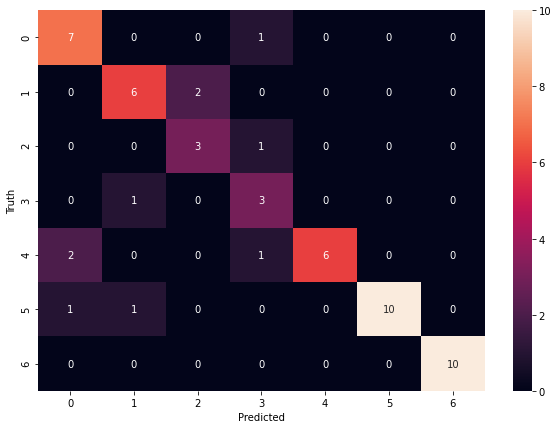

In [82]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True)
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [83]:
class_dict

{'maria_sharapova': 0,
 'messi': 1,
 'puyol': 2,
 'roger_federer': 3,
 'serena_williams': 4,
 'ter_stegen': 5,
 'virat_kohli': 6}

In [84]:
#saving the model as pickle ie pkl
%pip install joblib #in case of jupyter use !pip...
import joblib

joblib.dump(best_clf, 'saved_model.pkl')


[notice] A new release of pip available: 22.1.2 -> 22.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


['saved_model.pkl']

In [85]:
#saving the class_dictonary into json
import json
with open("class_dictonary.json", "w") as f:
    f.write(json.dumps(class_dict))